In [319]:

import os
import pandas
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [320]:
# load the training & Test Data.

os.chdir(r"/Users/mrityunjay/Desktop/Deep Learning/Assignment/")

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

data_train = pandas.read_csv('iris_training.csv',names=names,skiprows=1)
data_test  = pandas.read_csv('iris_test.csv',names=names,skiprows=1)


In [321]:
data_train.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [322]:
data_train.shape

(120, 5)

In [323]:
data_test.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [324]:
data_test.shape

(30, 5)

In [325]:
# Training & test. data & label

X  = data_train.drop(labels=['species'], axis=1).values
y  = data_train.species.values

X1  = data_test.drop(labels=['species'], axis=1).values
y1  = data_test.species.values

In [326]:
# random seed
seed = 5
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

In [327]:
# Creating Index for train & test
train_index = np.random.choice(len(X), round(len(X) * 1), replace=False)
test_index  = np.random.choice(len(X1), round(len(X1) * 1), replace=False)

In [328]:
# train & test 

train_X = X[train_index]
train_y = y[train_index]
test_X = X1[test_index]
test_y = y1[test_index]

In [331]:
# Function for min max normalization

def normalized(df):
    c_max = np.max(df, axis=0)
    c_min = np.min(df, axis=0)
    return np.divide(df - c_min, c_max - c_min)

In [332]:
# Applied normalized here
train_X = normalized(train_X)
test_X = normalized(test_X)

In [333]:
# Disable_eager_execution
tf.compat.v1.disable_eager_execution()

In [334]:
# Tensor variable flow setting A & b

A = tf.compat.v1.Variable(tf.compat.v1.random_normal(shape=[4, 1]))
b = tf.compat.v1.Variable(tf.compat.v1.random_normal(shape=[1, 1]))

# init Tensor sess

init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

In [335]:
# Placeholeder Setting..

df =  tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 4])
tg = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None, 1])


In [336]:
# Define the logistic regression model

mod_logit = tf.matmul(df, A) + b

In [337]:
# Define the loss

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod_logit, labels=tg))


In [357]:
# Set parameters , Learning rate, bath size and iterations..

learning_rate = 0.001
b_size = 30
iteration = 300

In [347]:
# Optimizers funtion

opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)

In [348]:
# Loss minimize through optimizer

opt_loss = opt.minimize(loss)

In [341]:
# Define the accuracy, Prediction and Correctness

prd = tf.round(tf.sigmoid(mod_logit)) # Prediction

crt = tf.cast(tf.equal(prd, tg), dtype=tf.float32) # Correctness

acc = tf.reduce_mean(crt)  # Accuracy

# End of the definition of the model framework

In [367]:
# Start training model

# Define the variable that stores the result

t_loss = []
t_train_acc  = []
t_test_acc   = []


In [370]:
# Iterations..

for epoch in range(iteration):
    
    # Generate random batch index
    
    b_index = np.random.choice(len(train_X), size=b_size)
    b_train_X = train_X[b_index]
    b_train_y = np.matrix(train_y[b_index]).T
    
    sess.run(opt_loss, feed_dict={df: b_train_X, tg: b_train_y})
    t_loss = sess.run(loss, feed_dict={df: b_train_X, tg: b_train_y})
    
    t_train_acc = sess.run(acc, feed_dict={df: train_X, tg: np.matrix(train_y).T})
    t_test_acc  = sess.run(acc, feed_dict={df: test_X, tg: np.matrix(test_y).T})
  
    # recode the result
    
    loss_trace.append(t_loss)
    train_acc.append(t_train_acc)
    test_acc.append(t_test_acc)
    
    # output
    if (epoch + 1) % 30 == 0:
        print('After : {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, t_loss,
                                                                                 t_train_acc, t_test_acc))      

After:   30 loss: -5.019729 train_acc: 0.300000 test_acc: 0.466667
After:   60 loss: -7.776328 train_acc: 0.300000 test_acc: 0.466667
After:   90 loss: -6.089333 train_acc: 0.300000 test_acc: 0.466667
After:  120 loss: -4.856372 train_acc: 0.300000 test_acc: 0.466667
After:  150 loss: -5.010684 train_acc: 0.300000 test_acc: 0.466667
After:  180 loss: -5.023567 train_acc: 0.300000 test_acc: 0.466667
After:  210 loss: -3.079484 train_acc: 0.300000 test_acc: 0.466667
After:  240 loss: -4.096069 train_acc: 0.300000 test_acc: 0.466667
After:  270 loss: -2.844344 train_acc: 0.300000 test_acc: 0.466667
After:  300 loss: -6.197680 train_acc: 0.300000 test_acc: 0.466667


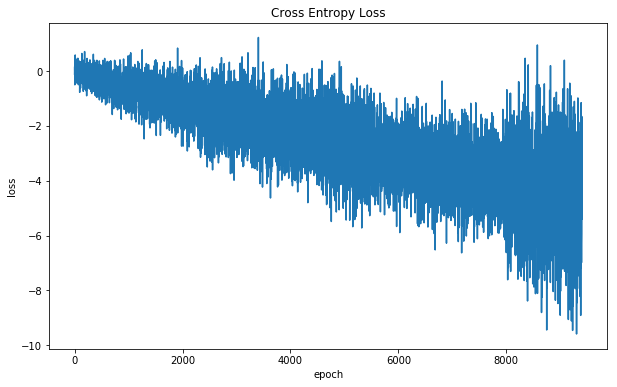

In [369]:
# Visualization of the results
# loss function

plt.rcParams["figure.figsize"] = [10,6]
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


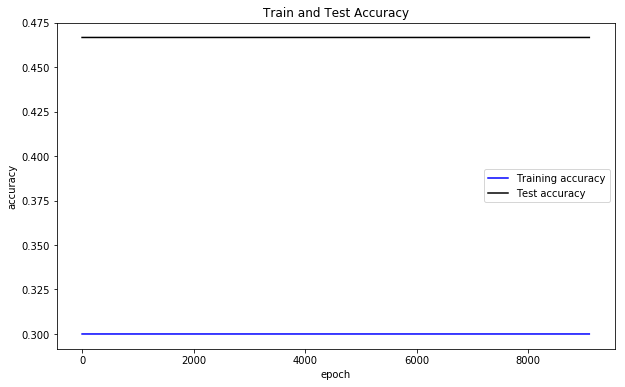

In [366]:
# accuracy
plt.plot(train_acc, 'b-', label='Training accuracy')
plt.plot(test_acc, 'k-', label='Test accuracy')
plt.title('Train and Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(loc='best')
plt.show()

In [ ]:
# End of Report #